# Exercise 1: Implement an MLP Class

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Set random seed for reproducibility
np.random.seed(42)
# Configure matplotlib
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
import numpy as np

class MLP:
    """
    Multi-Layer Perceptron with one hidden layer.
    Uses sigmoid activation and backpropagation.
    """

    def __init__(self, n_inputs, n_hidden, n_outputs, learning_rate=0.1):
        """
        Initialise the MLP.

        Parameters:
        -----------
        n_inputs : int
        Number of input features
        n_hidden : int
        Number of hidden neurons
        n_outputs : int
        Number of output neurons
        learning_rate : float
        Learning rate for weight updates
        """
        self.learning_rate = learning_rate
        # Input to hidden layer weights (weights_ih) and biases (bias_h)
        self.weights_ih = np.random.uniform(-0.5, 0.5, (n_inputs, n_hidden))
        self.bias_h = np.random.uniform(-0.5, 0.5, n_hidden)

        # Hidden to output layer weights (weights_ho) and biases (bias_o)
        # TODO: add code here for weights_ho and bias_o
        ## Hint: see code for weights_ih and bias_h above
        self.weights_ho = np.random.uniform(-1, 1, (n_hidden, n_outputs))
        self.bias_o = np.random.uniform(-1, 1, n_outputs)

    def sigmoid(self, x):
        """Sigmoid activation function."""
        # TODO: Implement sigmoid
        ## Hint: see Lab 1
        # Clip to avoid overflow in exp
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def sigmoid_derivative(self, x):
        """Derivative of sigmoid: σ'(x) = σ(x) * (1 - σ(x))."""
        # TODO: Implement sigmoid derivative
        ## Hint: see Lab 1
        s = self.sigmoid(x)
        return s * (1 - s)

    def forward(self, X):
        """
        Forward pass through the network.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_inputs)
        Input data

        Returns:
        --------
        array : Output activations
        """
        # TODO: code this entire method
        ## Hint: see Lab 1
        # Input to hidden
        self.z_h = np.dot(X, self.weights_ih) + self.bias_h
        self.a_h = self.sigmoid(self.z_h)
            
        # Hidden to output
        self.z_o = np.dot(self.a_h, self.weights_ho) + self.bias_o
        self.a_o = self.sigmoid(self.z_o)

        return self.a_o
     
    def backward(self, X, y):
        """
        Backward pass (backpropagation).

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_inputs)
        Input data
        y : array-like, shape (n_samples, n_outputs)
        Target outputs
        """
        # TODO: code this entire method
        ## Hint: see Lab 1
        m = X.shape[0]  # Number of samples
            
        # Output layer error
        output_error = y - self.a_o
        output_delta = output_error * self.sigmoid_derivative(self.z_o)
            
        # Hidden layer error
        hidden_error = np.dot(output_delta, self.weights_ho.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.z_h)
            
        # Update weights and biases
        self.weights_ho += self.learning_rate * np.dot(self.a_h.T, output_delta) / m
        self.bias_o += self.learning_rate * np.mean(output_delta, axis=0)
            
        self.weights_ih += self.learning_rate * np.dot(X.T, hidden_delta) / m
        self.bias_h += self.learning_rate * np.mean(hidden_delta, axis=0)

    def train(self, X, y, epochs, verbose=True):
        """
        Train the network.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_inputs)
        Training inputs
        y : array-like, shape (n_samples, n_outputs)
        Training targets
        epochs : int
        Number of training epochs
        verbose : bool
        Print progress if True

        Returns:
        --------
        list : Training loss history
        """
        losses = []

        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Compute loss (Mean Squared Error)
            loss = np.mean((y - output) ** 2)
            losses.append(loss)

            # Backward pass
            self.backward(X, y)

            if verbose and (epoch % 100 == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch}: Loss = {loss:.6f}")

        return losses

    def predict(self, X):
        """
        Make predictions.

        Returns the class with highest output activation.
        """
        output = self.forward(X)
        return np.argmax(output, axis=1)
        
print("MLP class defined successfully!")

MLP class defined successfully!


# Exercise 2:  Test the MLP on XOR

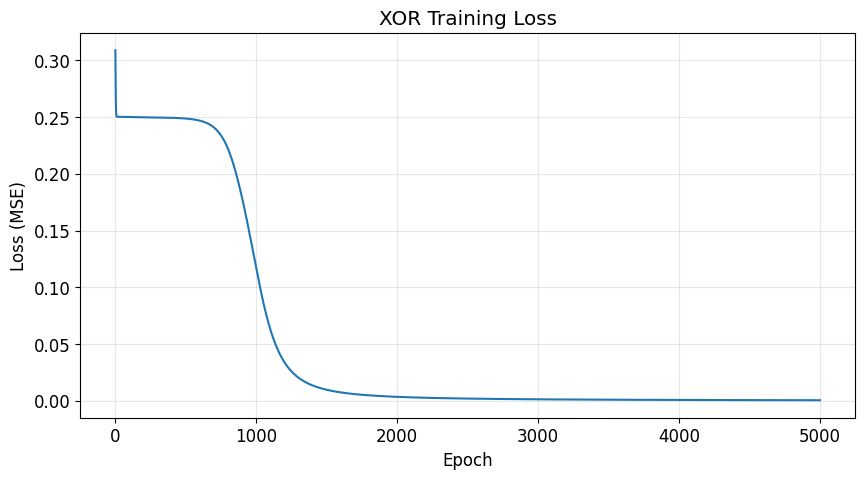


XOR Predictions:
--------------------------------------------------
Input: [0 0] -> Output: 0.0217 -> Rounded: 0 (Expected: 0) ✓
Input: [0 1] -> Output: 0.9823 -> Rounded: 1 (Expected: 1) ✓
Input: [1 0] -> Output: 0.9712 -> Rounded: 1 (Expected: 1) ✓
Input: [1 1] -> Output: 0.0248 -> Rounded: 0 (Expected: 0) ✓


In [7]:
# Define XOR data
# TODO: add code here to define XOR data
## Hint: see Lab 1
import matplotlib.pyplot as plt

X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_xor = np.array([[0], [1], [1], [0]])

# Create and train MLP
np.random.seed(42)
mlp_xor = MLP(n_inputs=2, n_hidden=4, n_outputs=1, learning_rate=2.0)
losses_xor = mlp_xor.train(X_xor, y_xor, epochs=5000, verbose=False)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses_xor)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('XOR Training Loss')
plt.grid(True, alpha=0.3)
plt.show()

# Test predictions
print("\nXOR Predictions:")
print("-" * 50)

for i in range(len(X_xor)):
    output = mlp_xor.forward(X_xor[i:i+1])
    rounded = round(output[0][0])
    correct = "✓" if rounded == y_xor[i][0] else "✗"
    print(f"Input: {X_xor[i]} -> Output: {output[0][0]:.4f} -> Rounded: {rounded} (Expected: {y_xor[i][0]}) {correct}")

# print("-" * 50)
# accuracy = np.mean([round(mlp_xor.forward(X_xor[i:i+1])[0][0]) == y_xor[i][0] for i in range(len(X_xor))])
# print(f"Accuracy: {accuracy*100:.1f}%")
